# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__REMOÇÃO DE FUNDO EM VÍDEOS COM SVD__</center>
#### <center>__Aluno:__ Cefras Mandú</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

Neste projeto, aplicamos decomposição matricial no contexto de Visão Computacional. O foco é a separação de camadas de imagens em vídeos, especificamente distinguindo o plano de fundo estático (background) de objetos em movimento (foreground).

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Em vigilância por vídeo e edição de imagens, é crucial isolar objetos móveis do cenário. Matematicamente, se considerarmos um vídeo como uma matriz onde cada coluna é um quadro (frame), o cenário de fundo tende a ser constante e repetitivo, enquanto os objetos móveis introduzem variações esparsas. O desafio é separar matematicamente essas duas componentes.

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

Utilizamos o **SVD (Singular Value Decomposition)** para realizar uma separação de posto baixo (Low-Rank).
A matriz de vídeo $M$ é aproximada por $L$ (Low-Rank) + $S$ (Sparse).
* **Por que é útil?** O fundo estático de um vídeo tem baixa variabilidade matemática, o que significa que ele pode ser capturado pelo primeiro (e maior) valor singular da decomposição SVD. Ao reconstruir a matriz usando apenas este componente principal ($k=1$), obtemos o fundo limpo. A subtração desse fundo da matriz original revela os objetos em movimento.

1. Geração de Dados Sintéticos (Simulando Vídeo)
 
        height, width, n_frames = 60, 60, 20
 
Fundo estático (listras verticais)
 
        background = np.zeros((height, width))
        background[:, ::10] = 1 

        M = np.zeros((height * width, n_frames))

        for i in range(n_frames):
            frame = background.copy()

Objeto em movimento (bloco branco)

            frame[20:30, (i*3)%width:(i*3+10)%width] = 2 

Achata o frame numa coluna


            M[:, i] = frame.reshape(-1) 

2. Decomposição SVD

        U, s, Vt = np.linalg.svd(M, full_matrices=False)

3. Extração do Fundo (Rank-1)

Usamos apenas o maior valor singular

        S_low_rank = np.zeros((len(s), len(s)))
        S_low_rank[0, 0] = s[0]
        background_reconstructed = U @ S_low_rank @ Vt

O movimento é a diferença
        
        foreground = M - background_reconstructed

4. Visualização do Frame 10 ---
        
        plt.figure(figsize=(10,3))
        plt.subplot(131); plt.imshow(M[:,10].reshape(height,width)); plt.title("Original")
        plt.subplot(132); plt.imshow(background_reconstructed[:,10].reshape(height,width)); plt.title("Fundo (SVD)")
        plt.subplot(133); plt.imshow(foreground[:,10].reshape(height,width)); plt.title("Objeto Isolado")
        plt.show()

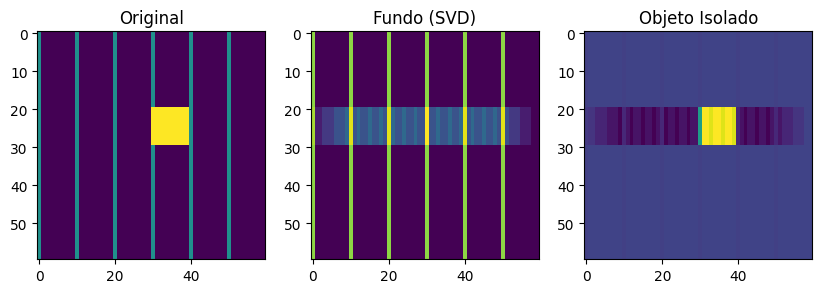

In [ ]:
height, width, n_frames = 60, 60, 20

background = np.zeros((height, width))
background[:, ::10] = 1 

M = np.zeros((height * width, n_frames))

for i in range(n_frames):
    frame = background.copy()
    
    frame[20:30, (i*3)%width:(i*3+10)%width] = 2 
    M[:, i] = frame.reshape(-1)


U, s, Vt = np.linalg.svd(M, full_matrices=False)


S_low_rank = np.zeros((len(s), len(s)))
S_low_rank[0, 0] = s[0]
background_reconstructed = U @ S_low_rank @ Vt


foreground = M - background_reconstructed


plt.figure(figsize=(10,3))
plt.subplot(131); plt.imshow(M[:,10].reshape(height,width)); plt.title("Original")
plt.subplot(132); plt.imshow(background_reconstructed[:,10].reshape(height,width)); plt.title("Fundo (SVD)")
plt.subplot(133); plt.imshow(foreground[:,10].reshape(height,width)); plt.title("Objeto Isolado")
plt.show()